**3. Drowsiness Detection Model: Description: In this task, you will train a machine learning model to detect whether a person is asleep or awake in a vehicle. The model should be capable of detecting multiple people in a single image or video, identifying how many people are present, and determining how many are sleeping. If someone is detected as sleeping, the model should mark them in red and also predict their age. You can also show a pop-up message saying the numbers of sleeping people and their age. Guidelines: You should have a proper GUI with features for both image and video. Should have a preview of the input image or video. Don’t forget to add the pop-up message.**

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jangedoo/utkface-new")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/utkface-new


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Download dataset
dataset_path = kagglehub.dataset_download("jangedoo/utkface-new")
dataset_dir = "/kaggle/input/utkface-new"

print("Path to dataset files:", dataset_dir)

# Ensure dataset is structured correctly
if not os.path.exists(dataset_dir):
    raise ValueError(f"Dataset path '{dataset_dir}' does not exist!")

# Define CNN model
def create_sleep_detection_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
        MaxPooling2D(2,2),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Data preprocessing
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(dataset_dir, target_size=(64, 64),
                                         batch_size=32, class_mode='binary', subset='training')

val_data = datagen.flow_from_directory(dataset_dir, target_size=(64, 64),
                                       batch_size=32, class_mode='binary', subset='validation')

# Define model
model = create_sleep_detection_model()

# Train model with callbacks
callbacks = [
    tf.keras.callbacks.ModelCheckpoint("sleep_detection_model_best.h5", save_best_only=True, monitor='val_loss'),
    tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
]

model.fit(train_data, validation_data=val_data, epochs=2, callbacks=callbacks)

# Save final model
model.save("sleep_detection_model.h5")

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



Path to dataset files: /kaggle/input/utkface-new
Found 53582 images belonging to 3 classes.
Found 13394 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.1456 - loss: -319864143872.0000

1675/1675 ━━━━━━━━━━━━━━━━━━━━ 497s 295ms/step - accuracy: 0.1456 - loss: -320797966336.0000 - val_accuracy: 0.1460 - val_loss: -9629515907072.0000
Epoch 2/2
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - accuracy: 0.1469 - loss: -33729193967616.0000

1675/1675 ━━━━━━━━━━━━━━━━━━━━ 447s 267ms/step - accuracy: 0.1469 - loss: -33754877788160.0000 - val_accuracy: 0.1460 - val_loss: -185241687818240.0000


In [ ]:
import numpy as np
# Define CNN model for age prediction
def create_age_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
        MaxPooling2D(2,2),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='linear')  # Regression output for age
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Custom data generator to convert labels to float
class AgeDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, generator):
        self.generator = generator
        self.labels = self.generator.labels.astype(np.float32)  # Convert to float32

    def __len__(self):
        return len(self.generator)

    def __getitem__(self, index):
        batch_x, batch_y = self.generator[index]
        return batch_x, batch_y.astype(np.float32)  # Convert batch labels to float32

# Data preprocessing
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(dataset_dir, target_size=(64, 64),
                                              batch_size=32, class_mode='sparse', subset='training')
val_generator = datagen.flow_from_directory(dataset_dir, target_size=(64, 64),
                                            batch_size=32, class_mode='sparse', subset='validation')

# Wrap with custom generator
train_data = AgeDataGenerator(train_generator)
val_data = AgeDataGenerator(val_generator)

# Define and Train Model
model = create_age_model()

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("age_model_best.h5", save_best_only=True, monitor='val_loss'),
    tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
]

model.fit(train_data, validation_data=val_data, epochs=2, callbacks=callbacks)

# Save Final Model
model.save("age_model.h5")


Found 53582 images belonging to 3 classes.
Found 13394 images belonging to 3 classes.
Epoch 1/2
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - loss: 0.8900 - mae: 0.8685

1675/1675 ━━━━━━━━━━━━━━━━━━━━ 456s 271ms/step - loss: 0.8900 - mae: 0.8685 - val_loss: 0.8344 - val_mae: 0.8553
Epoch 2/2
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 496s 267ms/step - loss: 0.8501 - mae: 0.8569 - val_loss: 0.8563 - val_mae: 0.8677


In [ ]:
!pip install mediapipe==0.10.8


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 9.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.6
    Uninstalling protobuf-4.25.6:
      Successfully uninstalled protobuf-4.25.6
  Attempting uninstall: mediapipe
    Found existing installation: mediapipe 0.10.21
    Uninstalling mediapipe-0.10.21:
      Successfully uninstalled mediapipe-0.10.21
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.17.0 requires protobuf<6.0.0,>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 which is incompatible.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 3.20.3 which is incompatible.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 3.20.3 which is inc

Select Mode:
1. Process Image
2. Process Video
Enter your choice (1/2): 1
Enter image file path: /content/drowsy_driver.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
Raw Age Prediction: 1.14
ALERT: 1 person(s) are sleeping! Ages: [1]


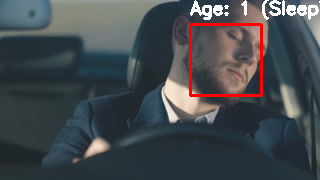

Processed image saved as: processed_output.jpg


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import mediapipe as mp
from google.colab.patches import cv2_imshow  # Only needed for Colab

# Load models (set compile=False to avoid warnings during inference)
sleep_model = tf.keras.models.load_model("sleep_detection_model.h5", compile=False)
age_model = tf.keras.models.load_model("age_model.h5", custom_objects={"mse": tf.keras.losses.MeanSquaredError()}, compile=False)

# Initialize Mediapipe Face Detection
mp_face_detection = mp.solutions.face_detection
face_detection = mp_face_detection.FaceDetection(min_detection_confidence=0.5)

# Function to detect faces and predict sleep state & age
def process_frame(frame):
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = face_detection.process(rgb_frame)
    sleeping_count = 0
    ages = []

    if results.detections:
        for detection in results.detections:
            bboxC = detection.location_data.relative_bounding_box
            h, w, _ = frame.shape
            x, y = int(bboxC.xmin * w), int(bboxC.ymin * h)
            width, height = int(bboxC.width * w), int(bboxC.height * h)

            # Clip bounding box to frame boundaries
            x = max(0, x)
            y = max(0, y)
            x2 = min(w, x + width)
            y2 = min(h, y + height)
            face = frame[y:y2, x:x2]

            if face.shape[0] > 0 and face.shape[1] > 0:
                face_resized = cv2.resize(face, (64, 64)) / 255.0
                face_resized = np.expand_dims(face_resized, axis=0)

                # Predict sleep state
                sleep_prediction = sleep_model.predict(face_resized)[0][0]
                is_sleeping = sleep_prediction > 0.5

                # Predict age
                age_prediction = age_model.predict(face_resized)
                age_prediction = age_prediction.flatten()[0] if isinstance(age_prediction, np.ndarray) else age_prediction
                print(f"Raw Age Prediction: {age_prediction:.2f}")

                # Scale age if model outputs between 0 and 1
                if age_prediction < 1:
                    age_prediction *= 100

                # Clamp to reasonable age range (adjust if needed)
                age_prediction = int(max(1, min(100, age_prediction)))
                ages.append(age_prediction)

                # Draw results
                color = (0, 0, 255) if is_sleeping else (0, 255, 0)
                label = f"Age: {age_prediction} {'(Sleeping)' if is_sleeping else ''}"
                cv2.rectangle(frame, (x, y), (x2, y2), color, 2)
                cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

                if is_sleeping:
                    sleeping_count += 1

    if sleeping_count > 0:
        print(f"ALERT: {sleeping_count} person(s) are sleeping! Ages: {ages}")

    return frame

# Process an image
def process_image(image_path):
    frame = cv2.imread(image_path)
    if frame is None:
        print("Failed to load image. Check the path.")
        return
    processed_frame = process_frame(frame)
    cv2_imshow(processed_frame)
    cv2.imwrite("processed_output.jpg", processed_frame)
    print("Processed image saved as: processed_output.jpg")

# Process a video file
def process_video(video_path):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Failed to open video. Check the path.")
        return

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        processed = process_frame(frame)
        cv2_imshow(processed)

    cap.release()
    cv2.destroyAllWindows()

# Main menu
def main():
    print("Select Mode:")
    print("1. Process Image")
    print("2. Process Video")
    choice = input("Enter your choice (1/2): ")

    if choice == "1":
        image_path = input("Enter image file path: ")
        process_image(image_path)
    elif choice == "2":
        video_path = input("Enter video file path: ")
        process_video(video_path)
    else:
        print("Invalid choice!")

# Run main
if __name__ == "__main__":
    main()
